# Introduction: The p-value in Normality Tests
- This notebook explores:  
    1) What is the p-value  
    2) Does the p-value change with the number of random samples, when sampling from:  
        - A Normal distribution  
        - A symmetrical Beta distribution
-**The p-value assumes the null hypothesis (Ho) of Normality, i.e., Normal Distribution, and measures how likely it is that any observed difference between groups is due to chance.**
- That is, the p-value measures the difference between two groups of data: (1) control group = Normal distribution  and (2) the experimental group = the sample group we are evaluating
- A p-value > 0.05 (5%) suggests that the experimental random sampling is probably Normal, whereas,  
a p-value <= 0.05 is "*signifcantly different*" and the experimental random sampling is probably NOT Normal. 
-**Example:**
-A p-value = 0.25, where n=50, there is a 25% probability that difference between the Normal distribution sampling and the experimental group is not due to chance.

- **Experiment 1, sampling from a Normal distribution shows that the range of p-values does not change with random value sample size ranging from 20 to 5,000**
    - 1,000 trials sampling a Normal distribution, yielded a Normally distributed population of p-values,    
    and a few trials returned *significant* results, i.e., p-values < 0.05
- **Experiment 2, - This test shows that the p-values distribution from a symmetical Beta distribution become increasingly smaller with increasing sample size and the distribution of p-values become asymmetrical** (note: the beta distribution visually approximates the Normal distribution, but with limited tails.
- **Experiment 3 - At what Lambda (dispersion) does Beta become Normal**
- Normality tests can yield p-values <= 0.05, yet visual inspection of the Q-Q plot looks linear
    - For example, Lambda=8 seldom yeilds p-values > .005, but the Q-Q plot looks linear
- **Experiment 4 - Evaluate a range of dispersion (Lambda in a Beta distribution) on the successful outcome of p-values > 0.05**
    - **Example**
    - a Lambda=3 in 1000 trials w/ n=1000 produces 0% of trials with p-values > 0.05,  
    - a Lambda=10 in 1000 trials w/ n=1000 produces 30% of trials with p-values > 0.05
    
D.M. Advocate, October 30, 2023


# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import shapiro
from scipy.stats import norm
from scipy.stats import beta
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14}) # Global command must set in top


# Descriptive Statistics Function

In [2]:
# Create a function to do descriptive statistics
def my_stats(var):
    import numpy as np
    from scipy.stats import skew
    from scipy.stats import kurtosis
    from scipy import stats
    print('Descriptive Statistics')
    print('mean:   ','{: .4f}'.format(np.mean(var)))
    print('sem:    ','{: .4f}'.format(stats.sem(var)))
    print('median: ','{: .4f}'.format(np.median(var)))
    print('min:    ','{: .4f}'.format(np.min(var)))
    print('max:    ','{: .4f}'.format(np.max(var)))
    print('stdev:  ','{: .4f}'.format(np.std(var)))
    print('skew:   ','{: .4f}'.format(skew(var)))
    print('kurt:   ','{: .4f}'.format(kurtosis(var)))
    print('p05:    ','{: .4f}'.format(np.percentile(var,5)))
    print('p50:    ','{: .4f}'.format(np.percentile(var,50)))
    print('p95:    ','{: .4f}'.format(np.percentile(var,95)))
    print('Count   ','{: .0f}'.format(np.size(var)))

# Graphic Comparison of Normal and Beta Distributions

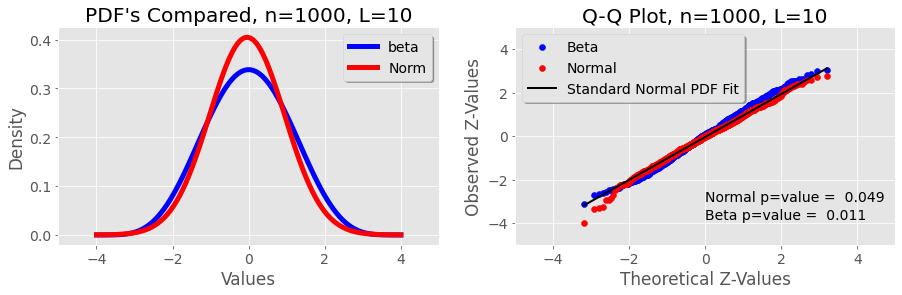

Beta Shape Parameters: a=6.0 b=6.0
Graphic examination of the Beta Q-Q plot would suggest PROBABLY NORMAL
But the Shapiro-Wilks p-value < 0.05, 70% of the time suggests PROBABLY NOT NORMAL (see Experiment 4)


In [101]:
# Compare Normal and Beta Distribution
from scipy.stats import kstest      # Kolmogorov-Smirnov
from scipy.stats import shapiro     # Shapiro-Wilks
from scipy.stats import chisquare   # Chi-Square
from scipy.stats import anderson    # Anderson-Darling
from scipy.stats import normaltest  # D'Agnosto Test
from scipy.stats import jarque_bera # Jarque-Bera
from statsmodels.stats.diagnostic import lilliefors #Lillierfors
import scipy

# Set up Min, Most-Likely and Max for the distribution, and Dispersion factor (Lambda) and sample size
amin = -4
bml =  0
cmax = 4
L=10
sample_size=1000

# Calculate the alpha and beta shape facors for the Beta distribution
a= 1 + L * (bml-amin) / (cmax-amin)
b= 1 + L * (cmax-bml) / (cmax-amin)

# Calculate random values from the Beta distirubion and the PDF
bvals =beta.rvs(a, b, loc=amin, scale=cmax-amin, size=sample_size, random_state=None)
bx = np.linspace(amin, cmax, 100)
by = beta.pdf(bx, a, b, loc=amin, scale=cmax-amin)

# Calculate random values from the Standard Normal distirubion and the PDF
nvals = norm.rvs(loc=0, scale=1, size=sample_size)
nx=np.linspace(amin, cmax, 100)
ny=norm.pdf(nx, np.mean(nvals), np.std(nvals))

# Set up Q-Q Plots for the Normal and Beta Distributions
qq_array_b = scipy.stats.probplot(bvals, dist="norm", plot=None)
x_beta, y_beta = qq_array_b[0]
slope_b, intercept_b, r_b = qq_array_b[1]

qq_array_n = scipy.stats.probplot(nvals, dist="norm", plot=None)
x_norm, y_norm = qq_array_n[0]
slope_n, intercept_n, r_n = qq_array_n[1]

# Shapiro-Wilks Normality test for the Beta and Sandard Normal distributions
stat_b, p_b = shapiro(bvals)
stat_n, p_n = shapiro(nvals)

# Plot Figure
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,4))
ax1.plot(bx, by, c='b', lw=5, label='beta')
ax1.plot(bx, ny, c='r', lw=5, label='Norm')
ax1.set_xlim(-5,5)
ax1.set_title("PDF's Compared, n=" +str(sample_size) + ", L=" + str(L))
ax1.set_xlabel('Values')
ax1.set_ylabel('Density')

ax2.scatter(x_beta, y_beta, c='b', label="Beta")
ax2.scatter(x_norm, y_norm, c='r', label="Normal")
ax2.plot(x_norm, x_norm*slope_n+intercept_n, c='k', lw=2, label='Standard Normal PDF Fit')
ax2.set_xlim(-5,5)
ax2.set_ylim(-5,5)
ax2.set_title("Q-Q Plot, n=" +str(sample_size)+ ", L=" + str(L))
ax2.set_xlabel('Theoretical Z-Values')
ax2.set_ylabel('Observed Z-Values')
ax2.text(0, -3, 'Normal p=value = ' +str('{: .3f}'.format(p_n)))
ax2.text(0, -3.8, 'Beta p=value = ' +str('{: .3f}'.format(p_b)))

ax1.legend(shadow=True)
ax2.legend(shadow=True, loc='upper left')
plt.show()
print('Beta Shape Parameters: a=' +str(a), 'b='+str(b))
print('Graphic examination of the Beta Q-Q plot would suggest PROBABLY NORMAL')
print('But the Shapiro-Wilks p-value < 0.05, 70% of the time suggests PROBABLY NOT NORMAL (see Experiment 4)')

# Experiment 1. Monte Carlo (array of sample sizes)
- **You can change:**
- number of trials
- experimental group (data), either Normal or Beta distributions
- Normality test type
-**Note: The Normal group yield similar results across an array of sample size, whereas the Beta group yields significantly different results across an array of sample size**

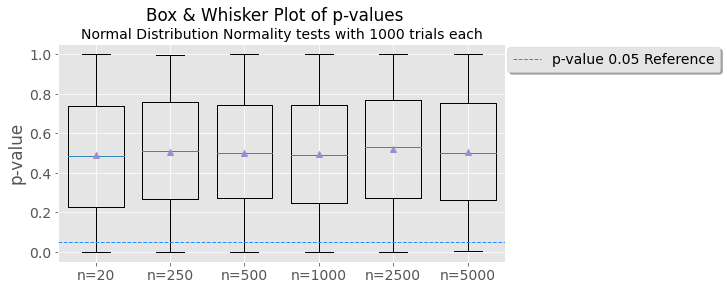

Rectangles represent the interquartile range, blue lines = median, triangles = mean


In [104]:
# Monte Carlo
trials=1000

list=[20, 250, 500, 1000, 2500, 5000] #Sample sizes to test
for j in list:
    n=j      

    globals()["out_"+str(j)]=[]
############################ Loop Through n_trials ############################
    n_trials=trials-1
    i=0
    while(i <=n_trials):
        # Change data type below:
        data = norm.rvs(loc=0, scale=1, size=j, random_state=None) 
        #data = beta.rvs(7, 7, loc=-4, scale=8, size=n, random_state=None)
        
        # Change Normality Test type below:
        stat, p = shapiro(data)
        #stat, p = normaltest(data)
        #stat, p = jarque_bera(data)
        #stat, p = lilliefors(data)
        globals()["out_"+str(j)].append(p)  
        i=i+1

# Box and Whisker Plot Routine
list=[1,2,3,4,5,6]
figdata=[out_20, out_250, out_500, out_1000, out_2500, out_5000]

fig = plt.figure(figsize=(8,4))
plt.boxplot(figdata, widths=.75, notch=False, showmeans=True) #, patch_artist=True)
plt.xticks([1, 2, 3, 4, 5, 6], ['n=20','n=250', 'n=500', 'n=1000', 'n=2500','n=5000'])
plt.suptitle('Box & Whisker Plot of p-values', y=1.01)
plt.title('Normal Distribution Normality tests with ' +str(trials)+' trials each', fontsize=14)
plt.ylabel('p-value')
#plt.figtext(0.5, 0, "Range of p-values unchanged with number of random samples", ha="center")
plt.axhline(.05, color='dodgerblue', lw=1, linestyle='--', label='p-value 0.05 Reference')
plt.legend(shadow=True, bbox_to_anchor=(.99, 1.02))
plt.show()
print('Rectangles represent the interquartile range, blue lines = median, triangles = mean')

# Experiment 2. Monte Carlo of Symmetrical Beta Distributions
- This test shows that the p-values distribution from a symmetical Beta distribution become increasingly smaller with increasing sample size and the distribution of p-values become asymmetrical 

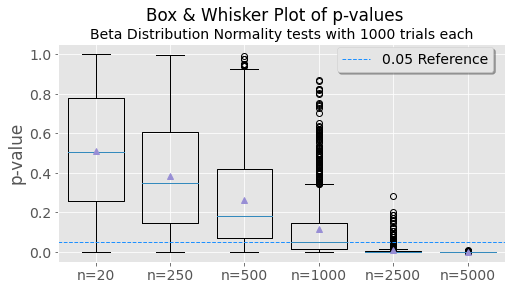

Rectangles represent the interquartile range, blue lines = median, triangles = mean, circles = outliers


In [106]:
# Monte Carlo of a symmetrical Beta distribution
trials=1000

list=[20, 250, 500, 1000, 2500, 5000] #Sample sizes to test
for j in list:
    n=j      

    globals()["out_"+str(j)]=[]
############################ Loop Through n_trials ############################
    n_trials=trials-1
    i=0
    while(i <=n_trials):
        # Change data type below:
        #data = norm.rvs(loc=0, scale=1, size=j, random_state=None) 
        data = beta.rvs(7, 7, loc=-4, scale=8, size=n, random_state=None)
        
        # Change Normality Test type below:
        stat, p = shapiro(data)
        #stat, p = normaltest(data)
        #stat, p = jarque_bera(data)
        #stat, p = lilliefors(data)
        globals()["out_"+str(j)].append(p)  
        i=i+1

# Box and Whisker Plot Routine
list=[1,2,3,4,5,6]
figdata=[out_20, out_250, out_500, out_1000, out_2500, out_5000]

fig = plt.figure(figsize=(8,4))
plt.boxplot(figdata, widths=.75, notch=False, showmeans=True) #, patch_artist=True)
plt.xticks([1, 2, 3, 4, 5, 6], ['n=20','n=250', 'n=500', 'n=1000', 'n=2500','n=5000'])
plt.suptitle('Box & Whisker Plot of p-values', y=1.01)
plt.title('Beta Distribution Normality tests with ' +str(trials)+' trials each', fontsize=14)
plt.ylabel('p-value')
#plt.figtext(0.5, 0, "Range of p-values unchanged with number of random samples", ha="center")
plt.axhline(.05, color='dodgerblue', lw=1, linestyle='--', label='0.05 Reference')
plt.legend(shadow=True, bbox_to_anchor=(.99, 1.02))
plt.show()
print('Rectangles represent the interquartile range, blue lines = median, triangles = mean, circles = outliers')

# Experiment 3. At what Lambda (dispersion) does Beta become Normal
- Normality test can yield p-values <= 0.05, yet visual inspection of the Q-Q plot looks linear
    - For example, Lambda=8 seldom yeilds p-values > .005, but the Q-Q plot looks linear
    - Experiment 4, a Monte Carlo, quantifies the number of successful trials (counts) over a range of Lambda values 

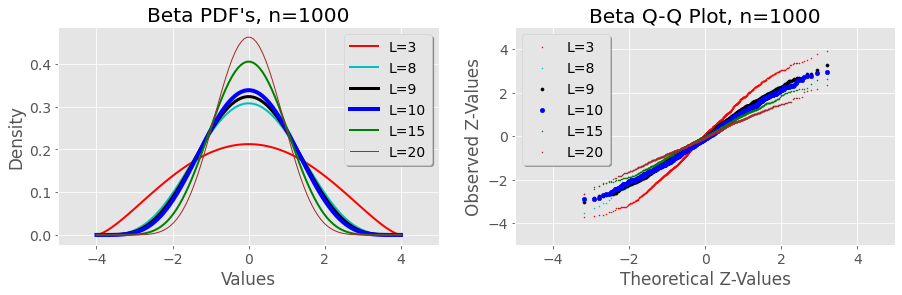

p-values > 0.05 are PROBABLY NORMAL, but results can vary with the number of trials
p-value for L = 3:  0.000
p-value for L = 8:  0.034
p-value for L = 9:  0.008
p-value for L = 10:  0.005
p-value for L = 15:  0.056
p-value for L = 20:  0.349
Lambda's <= 9 have p-values consistently <= 0.05
Lambda's = 10 sometimes have p-values consistently > 0.05
Lambda's >= 11 have p-values consistently > 0.05


In [98]:
amin = -4
bml =  0
cmax = 4
sample_size=1000

# Evaluate Standard Normal Distribution ######################
nvals = norm.rvs(loc=0, scale=1, size=sample_size)
nx=np.linspace(amin, cmax, 100)
ny=norm.pdf(nx, np.mean(nvals), np.std(nvals))

qq_array_n = scipy.stats.probplot(nvals, dist="norm", plot=None)
x_norm, y_norm = qq_array_n[0]
slope_n, intercept_n, r_n = qq_array_n[1]

stat_n, p_n = shapiro(nvals)

# Evaluate Beta for a range of Lambdas #######################
Lambdas=[3, 8, 9, 10, 15, 20]

out_ab=[]
for L in Lambdas: 
    a= 1 + L * (bml-amin) / (cmax-amin)
    b= 1 + L * (cmax-bml) / (cmax-amin)

    globals()["bvals_"+str(L)] =beta.rvs(a, b, loc=amin, scale=cmax-amin, size=sample_size, random_state=None)
    globals()["bx_"+str(L)] = np.linspace(amin, cmax, 100)
    globals()["by_"+str(L)] = beta.pdf(bx, a, b, loc=amin, scale=cmax-amin)



    # Set up Q-Q Plots for the Normal and Beta Distributions
    globals()["qq_array_b_"+str(L)] = scipy.stats.probplot(globals()["bvals_"+str(L)], dist="norm", plot=None)
    globals()["x_beta_"+str(L)], globals()["y_beta_"+str(L)] = globals()["qq_array_b_"+str(L)][0]
    # slope_b, intercept_b, r_b = qq_array_b[1]

    # Shapiro-Wilks Normality test
    globals()["stat_b_"+str(L)], globals()["p_b_"+str(L)] = shapiro(globals()["bvals_"+str(L)])

    # Write out Beta Shape factors (alpha and beta) for array of Lambdas (L)
    out_ab.append(a)

# Plot Figure
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,4))
ax1.plot(bx_3, by_3,   c='r', lw=2, label='L=3')
ax1.plot(bx_8, by_8,   c='c', lw=2, label='L=8')
ax1.plot(bx_9, by_9,   c='k', lw=3, label='L=9')
ax1.plot(bx_10, by_10, c='b', lw=4, label='L=10')
ax1.plot(bx_15, by_15, c='g', lw=2, label='L=15')
ax1.plot(bx_20, by_20, c='brown', lw=1, label='L=20')

ax1.set_xlim(-5,5)
ax1.set_title("Beta PDF's, n=" +str(sample_size))
ax1.set_xlabel('Values')
ax1.set_ylabel('Density')
                                                                                          
ax2.scatter(x_beta_3,  y_beta_3,   c='r',    s=1, label='L=3')
ax2.scatter(x_beta_8,  y_beta_8,   c='c',    s=1, label='L=8')
ax2.scatter(x_beta_9,  y_beta_9,   c='k',    s=10, label='L=9')
ax2.scatter(x_beta_10, y_beta_10,  c='b',    s=20, label='L=10')
ax2.scatter(x_beta_15, y_beta_15,  c='g',    s=1, label='L=15')
ax2.scatter(x_beta_20, y_beta_20,  c='brown', s=1, label='L=20')                                                                                          
                                                                                                                                                                               
ax2.set_xlim(-5,5)
ax2.set_ylim(-5,5)
ax2.set_title("Beta Q-Q Plot, n=" +str(sample_size))
ax2.set_xlabel('Theoretical Z-Values')
ax2.set_ylabel('Observed Z-Values')

ax1.legend(shadow=True)
ax2.legend(shadow=True)
plt.show()
print('p-values > 0.05 are PROBABLY NORMAL, but results can vary with the number of trials')
print("p-value for L = 3:",  '{: .3f}'.format(p_b_3))
print("p-value for L = 8:",  '{: .3f}'.format(p_b_8))
print("p-value for L = 9:",  '{: .3f}'.format(p_b_9))
print("p-value for L = 10:", '{: .3f}'.format(p_b_10))
print("p-value for L = 15:", '{: .3f}'.format(p_b_15))
print("p-value for L = 20:", '{: .3f}'.format(p_b_20))
print("Lambda's <= 9 have p-values consistently <= 0.05")
print("Lambda's = 10 sometimes have p-values consistently > 0.05")
print("Lambda's >= 11 have p-values consistently > 0.05")


# Experiment 4. Evaluate a Range of Lambda (Beta Distribution)
- What percent of p-values are > 0.05 for 1000 trials on a range of Lambdas
- Uses the Shapiro-Wilks Normality Test
- The number of successful trials will decrease as number of random Beta distribution samples (n) increases
- The routine only works on symmetrical distributions, i.e., assumes ttha alpha = beta shape parameters

In [96]:
# Find Percent of trials with p-values > 0.05 for a range of Lambdas

# Beta distribuion Min, Most-Likely (mode), and Max
amin=75
bml=100
cmax=125

# Set the number of samples, trials and critical value for analysis
n=1000
trials=1000
critical_value=0.05

# Evaluate the following list dispersion factors (lambda)
Lambdas=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

############################ Loop Through n_trials ############################

# Initilize result arrays
for L in Lambdas:
    globals()["out1_"+str(L)]=[]
    globals()["out2_"+str(L)]=[]
    globals()["out3_"+str(L)]=[]

# Monte Carlo the analysis
n_trials=trials-1
i=0
while(i <=n_trials):
    for L in Lambdas:
        a= 1 + L * (bml-amin) / (cmax-amin)
        b= 1 + L * (cmax-bml) / (cmax-amin)
        
        # Random sample of Beta distriubion
        globals()["bvals_"+str(L)] = beta.rvs(a, b, loc=amin, scale=cmax-amin, size=n, random_state=None)
        
        # Shipiro-Wilks Normality Test
        globals()["s_b_"+str(L)], globals()["p_b_"+str(L)] = shapiro(globals()["bvals_"+str(L)])
        
        # Count the number of trials where p-value > 0.05
        if globals()["p_b_"+str(L)] >= critical_value:
            globals()["count_"+str(L)]=1   
        else:
            globals()["count_"+str(L)]=0
            
        # Append trial results
        globals()["out1_"+str(L)].append(globals()["p_b_"+str(L)])
        globals()["out2_"+str(L)].append(globals()["s_b_"+str(L)])
        globals()["out3_"+str(L)].append(globals()["count_"+str(L)])
    
    i=i+1

print("Percent of " +str(trials) + " trials greater than critical value for a range of lambdas")
print("Sample size = ", n)
print("EXAMPLES FOR PROF OF CONCEPT")
print("=======================================================================================")
print("Count for L=03",'{: .1%}'.format(np.sum(out3_3)/trials), 'p-values > critical value')
print("Count for L=07",'{: .1%}'.format(np.sum(out3_7)/trials), 'p-values > critical value')
print("Count for L=09",'{: .1%}'.format(np.sum(out3_9)/trials), 'p-values > critical value')
print("Count for L=10",'{: .1%}'.format(np.sum(out3_10)/trials), 'p-values > critical value')
print("Count for L=15",'{: .1%}'.format(np.sum(out3_15)/trials), 'p-values > critical value')
print("Count for L=20",'{: .1%}'.format(np.sum(out3_20)/trials), 'p-values > critical value')

Percent of 1000 trials greater than critical value for a range of lambdas
Sample size =  1000
EXAMPLES FOR PROF OF CONCEPT
Count for L=03  0.0% p-values > critical value
Count for L=07  3.1% p-values > critical value
Count for L=09  20.0% p-values > critical value
Count for L=10  28.7% p-values > critical value
Count for L=15  68.6% p-values > critical value
Count for L=20  80.0% p-values > critical value


## Experiment 4 Results: Lambda vs Success

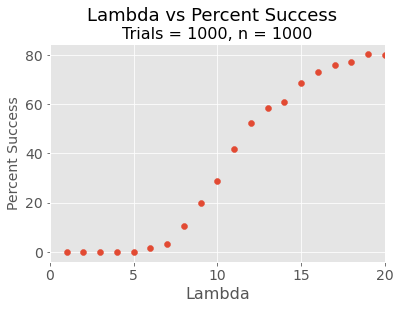

,Lambda,Counts,pct_success
0,1,0,0.0
1,2,0,0.0
2,3,0,0.0
3,4,0,0.0
4,5,0,0.0
5,6,14,1.4
6,7,31,3.1
7,8,106,10.6
8,9,200,20.0
9,10,287,28.7


In [97]:
# Merge count arrays from cell above
for L in Lambdas:
    mrg_arrays = np.array([np.sum(out3_1), np.sum(out3_2), np.sum(out3_3), np.sum(out3_4), np.sum(out3_5),
                           np.sum(out3_6), np.sum(out3_7), np.sum(out3_8), np.sum(out3_9), np.sum(out3_10),
                           np.sum(out3_11), np.sum(out3_12), np.sum(out3_13), np.sum(out3_14), np.sum(out3_15),
                           np.sum(out3_16), np.sum(out3_17), np.sum(out3_18), np.sum(out3_19), np.sum(out3_20)])

# Build a dataframe with Lambda and counts of trials with p-value > 0.05
df1 = pd.DataFrame(data=[Lambdas, mrg_arrays]).T
df1.columns=['Lambda', 'Counts']
df1['pct_success'] = df1['Counts']/trials*100

# Chart and print results of experiment 4
plt.scatter(df1['Lambda'], df1['pct_success'])
plt.suptitle('Lambda vs Percent Success', y=1.01, fontsize=18)
plt.title('Trials = ' +str(trials) + ', n = ' +str(n), fontsize=16)
plt.xlim(0,20)
plt.xlabel('Lambda', fontsize=16)
plt.ylabel('Percent Success', fontsize=14)
plt.show()
display(df1)